In [1]:
import os
import sys
# in order to load the code located in parent directory as a package
orig_dir = os.getcwd()
package_dir = os.path.join(os.path.dirname(os.getcwd()))
sys.path.insert(0, package_dir)

In [2]:
from stresspred import (code_paths,
                        P5_StressDataLoader, 
                        P5M5DataLoader, 
                        hb_extract, 
                        peak_time_to_rri, 
                        resample_nonuniform, 
                        timestamp_to_samp,
                        samp_to_timestamp,
                        find_local_hb_peaks,
                        get_local_hb_sig,
                        argtop_k)

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
for path in code_paths["neurokit2_paths"]:
    sys.path.insert(0, path)
import neurokit2 as nk

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from json_tricks import dump, dumps, load, loads

In [10]:
out_parent_path_rstr = r"Z:\Shared\Documents\RD\RD2\_Projets\Pascal\P5 In-Ear Biosignal Monitoring\DanielleEersBridge\P5_Stress_label\_gitSave\hb_extraction\rests_5subs\json_files"
out_parent_path = os.path.join(*out_parent_path_rstr.split("\\"))
if not os.path.exists(out_parent_path):
    os.makedirs(out_parent_path)

In [11]:
min_bpm = 40
max_bpm = 200
interval_min = 60/max_bpm
interval_max = 60/min_bpm
            
for sub_id in [1,2,3,5,6]:
    out_path = os.path.join(out_parent_path, "out" + str(sub_id) + ".json")
    out = {}
    class_timestamps = P5_StressDataLoader(sub_id=sub_id).get_timestamps_df_for_class()
    rest_labels = [label for label in class_timestamps["label"].values if "rest" in label]
    for label in rest_labels:
        out[label] = {}
        for sig_name in ["zephyr_ecg", "ieml"]:
            
            start = class_timestamps[class_timestamps["label"]==label]["start_time"].values[0]
            end = class_timestamps[class_timestamps["label"]==label]["end_time"].values[0]
            start = start + 15
            end = start + 30
            sig_info = P5_StressDataLoader(sub_id=sub_id).get_sig(sig_name=sig_name, start_time=start, end_time=end, new_sampling_rate=8000)
            sig_info["peak_time"] = hb_extract(sig=sig_info["sig"], sig_time=sig_info["time"], sig_name=sig_info["name"])
            sig_info["cor_peak_time"] = find_local_hb_peaks(sig_info["peak_time"], 
                                 sig=sig_info["sig"], 
                                 sig_time=sig_info["time"], 
                                 sampling_rate=sig_info["sampling_rate"], 
                                 check_height_outlier=True)
            samp = timestamp_to_samp(sig_info["cor_peak_time"], sig_info["sampling_rate"], sig_info["time"])
            clean_peak_samp = nk.signal_fixpeaks(
                samp,
                sampling_rate=sig_info["sampling_rate"],
                interval_min=interval_min, interval_max=interval_max, method="neurokit")
            clean_peak_time = samp_to_timestamp(clean_peak_samp, sig_time=sig_info["time"])
            cor_clean_peak_time = find_local_hb_peaks(clean_peak_time, 
                     sig=sig_info["sig"], 
                     sig_time=sig_info["time"], 
                     sampling_rate=sig_info["sampling_rate"], 
                     check_height_outlier=True)
            sig_info["cor_clean_peak_time"] = cor_clean_peak_time
            out[label][sig_name] = sig_info 
            with open(out_path, "w") as json_file:
                dump(out, json_file)

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning

Rest duration was only 124.93395499999997. Skipping.
Rest duration was only 22.984112000000096. Skipping.


C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


Rest duration was only 67.61083200000007. Skipping.


C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warnin

There were multiple instances of mentalNoise-task-start. Picking the last instance.


C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")
C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in

In [13]:
json_paths = [ f.path for f in os.scandir(out_parent_path) if "out" in f.path and ".json" in f.path ]

In [14]:
out_figure_dir_path_rstr = r"Z:\Shared\Documents\RD\RD2\_Projets\Pascal\P5 In-Ear Biosignal Monitoring\DanielleEersBridge\P5_Stress_label\_gitSave\hb_extraction\rests_5subs\figures"
out_figure_dir_path = os.path.join(*out_figure_dir_path_rstr.split("\\"))
if not os.path.exists(out_figure_dir_path):
    os.makedirs(out_figure_dir_path)

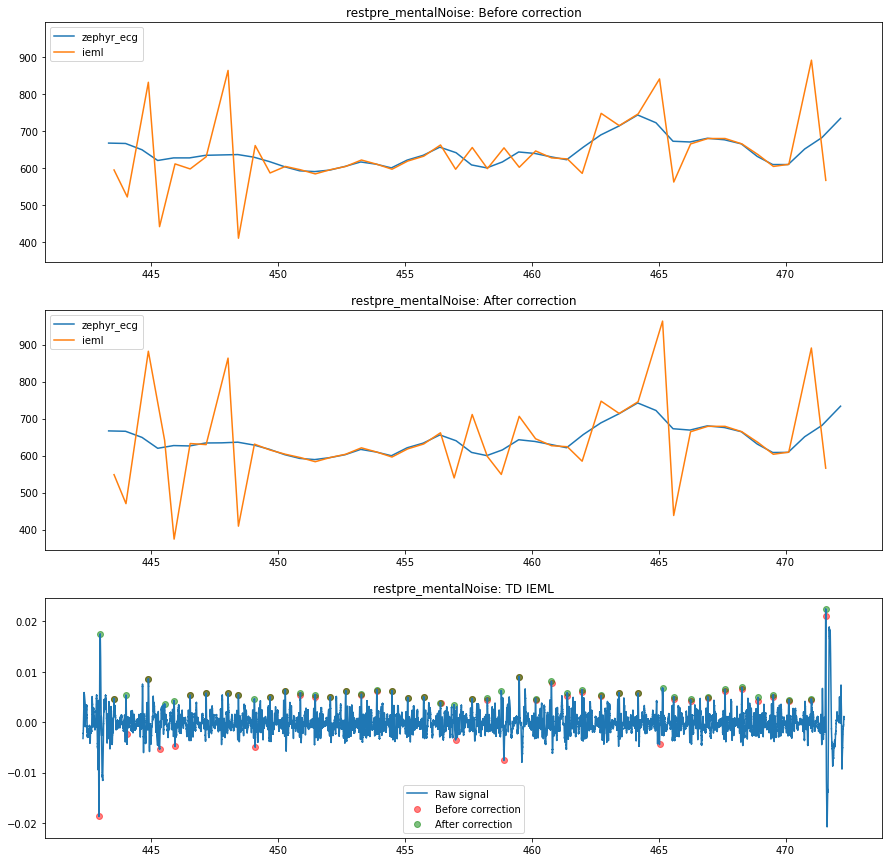

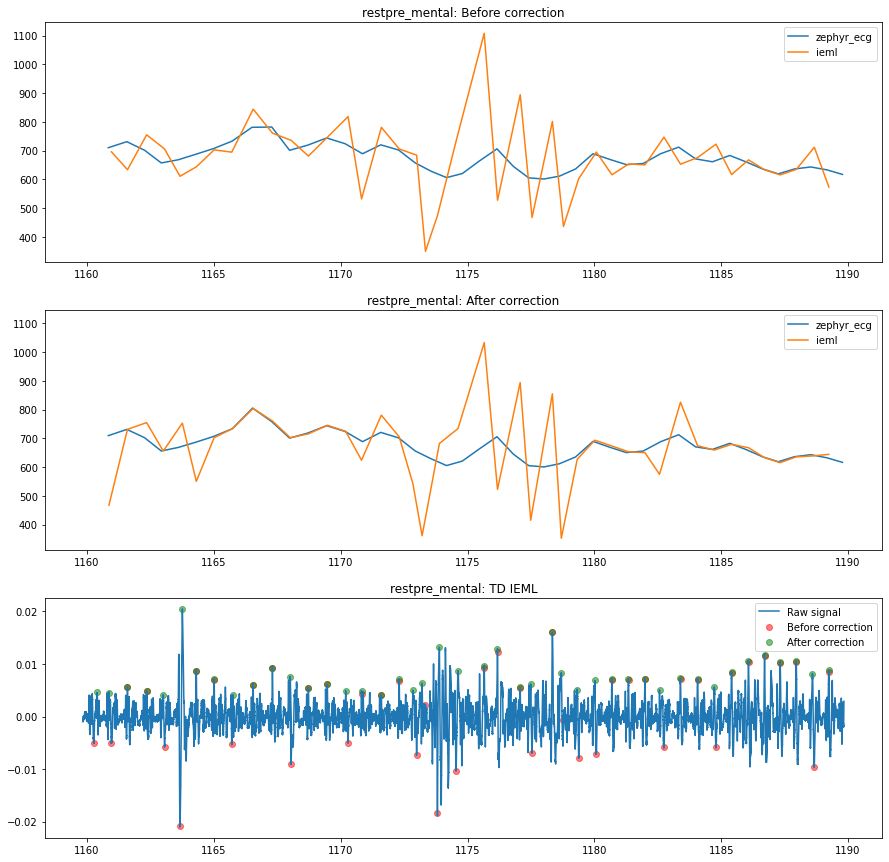

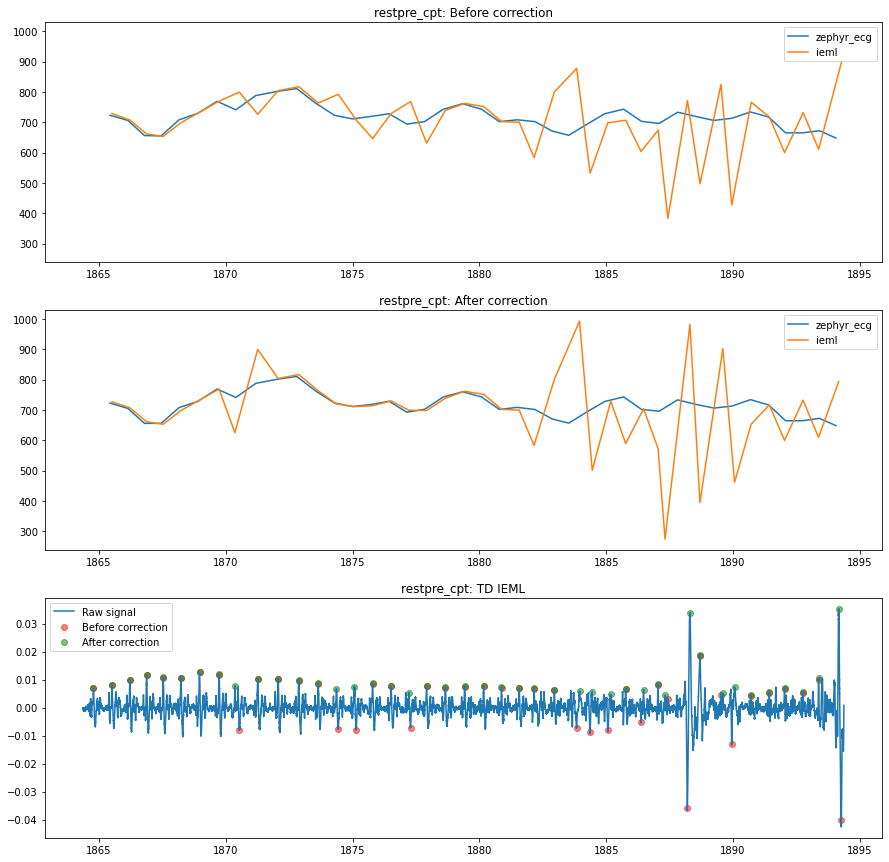

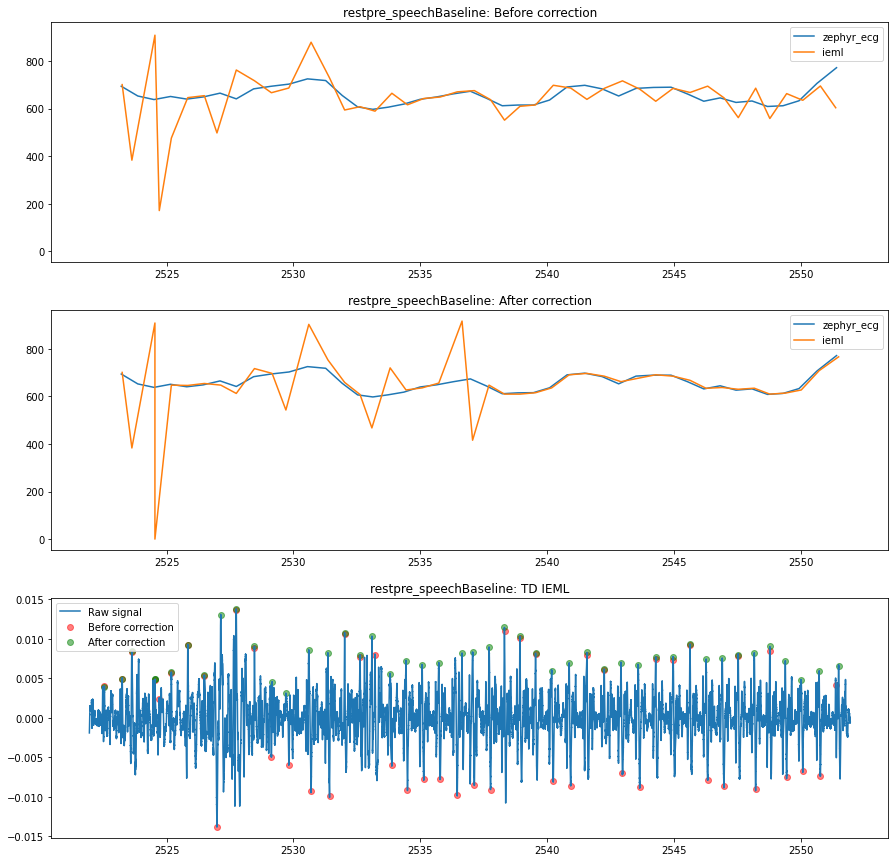

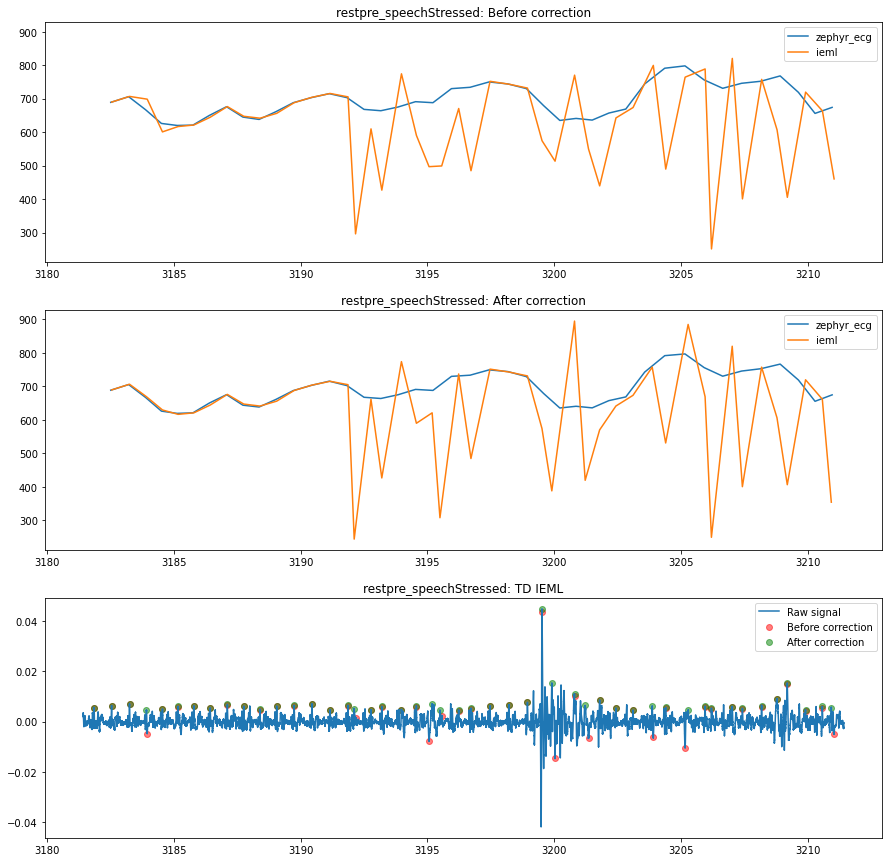

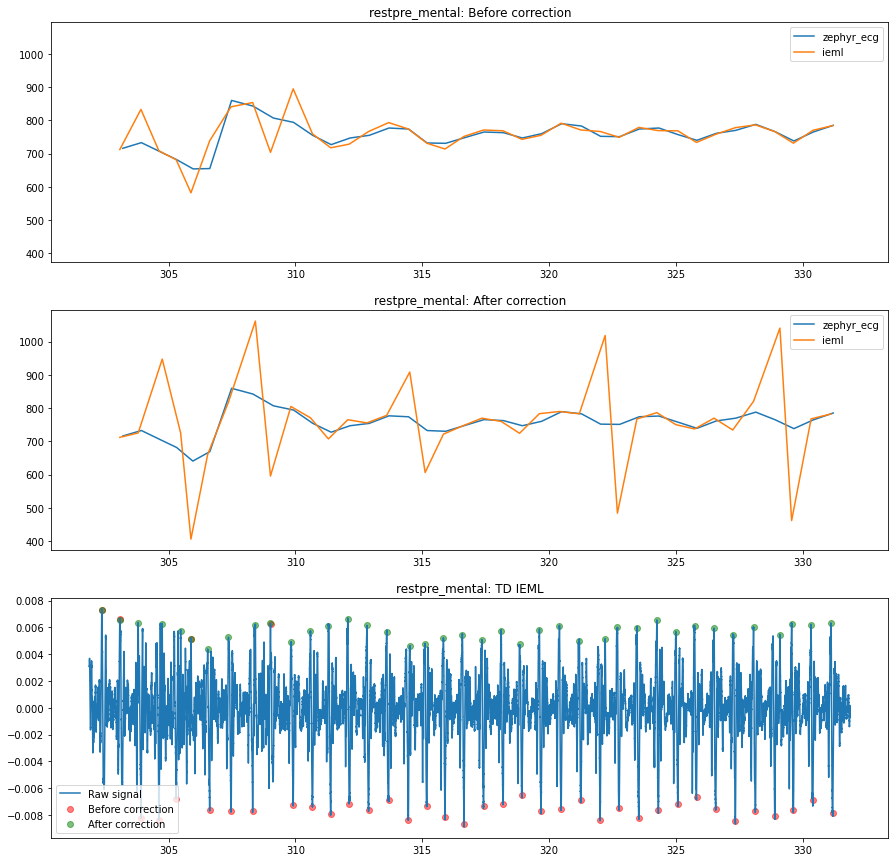

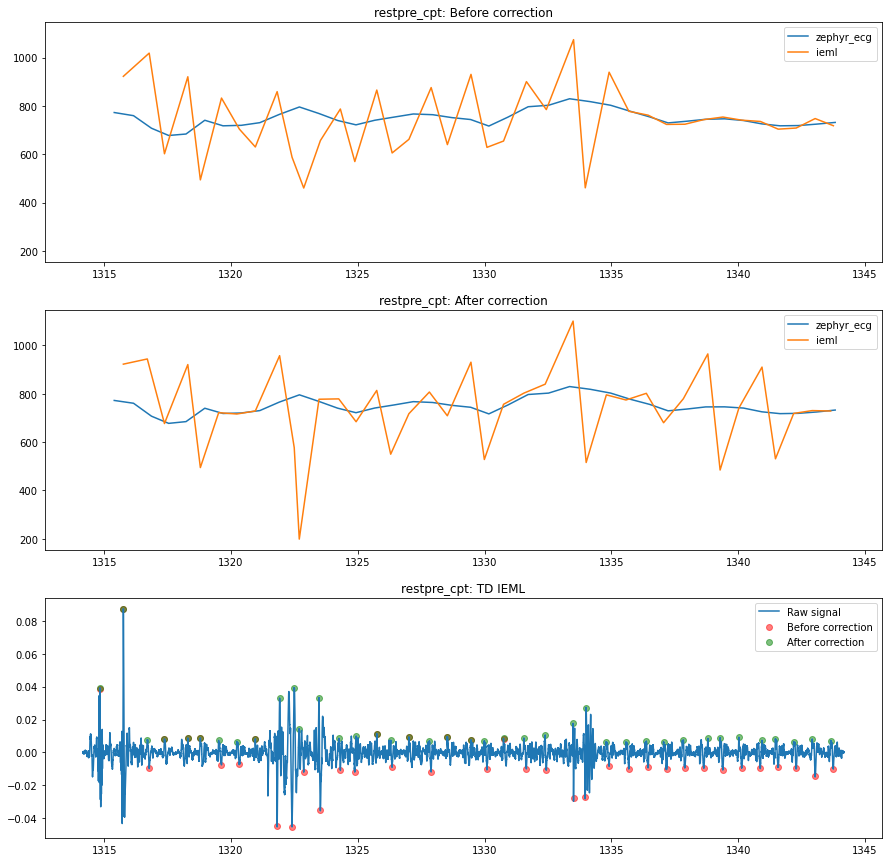

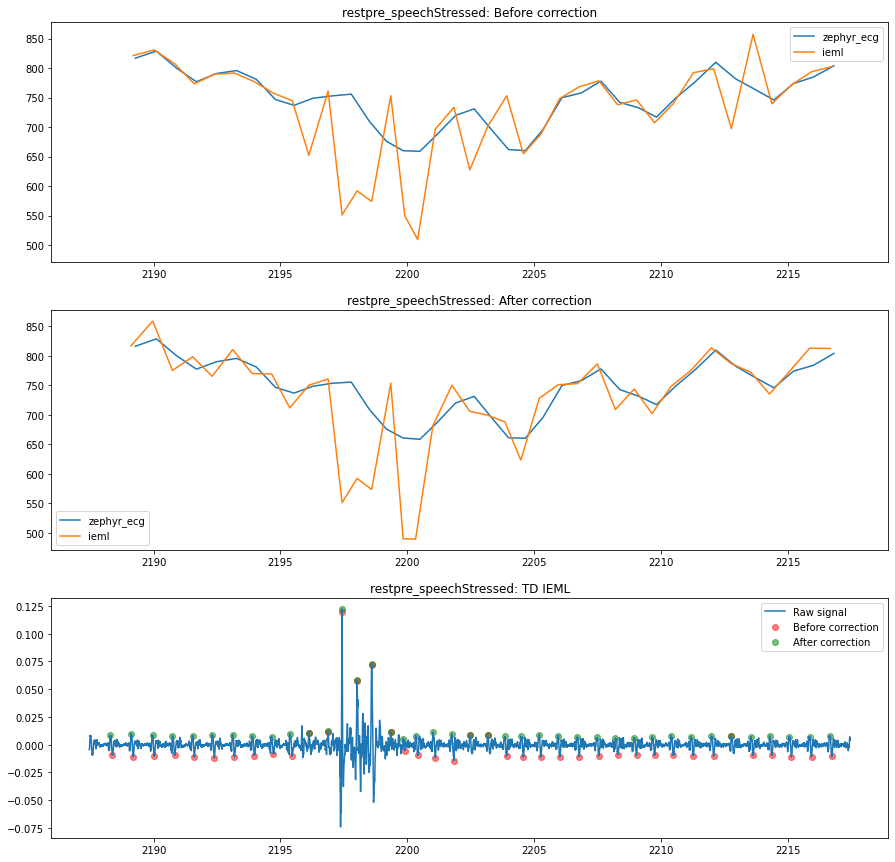

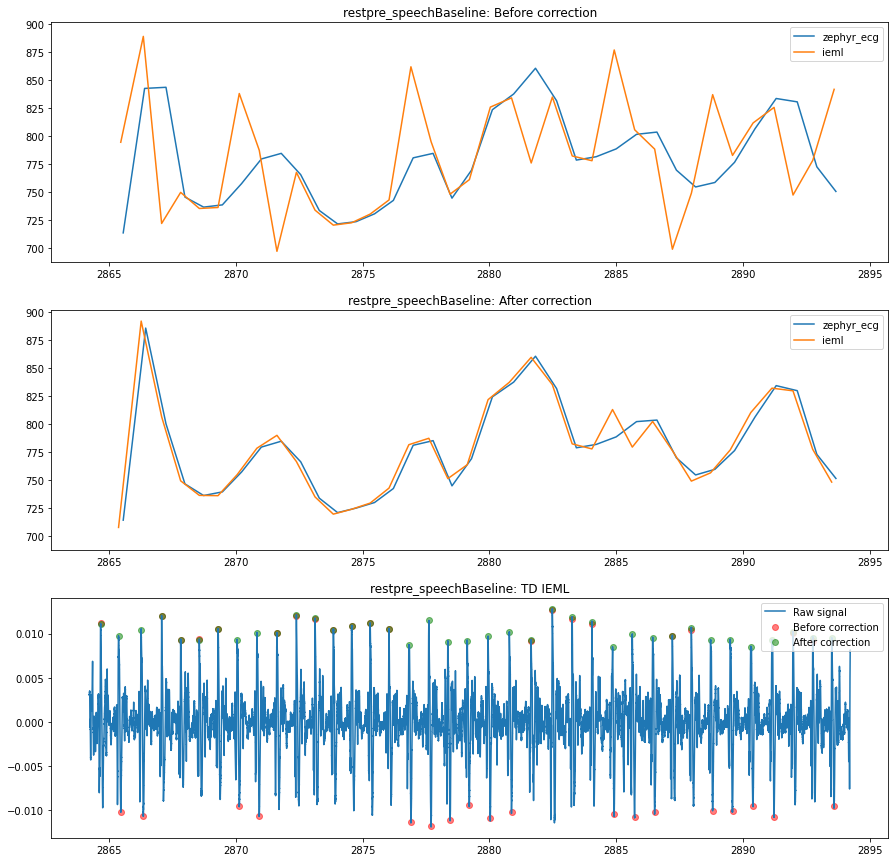

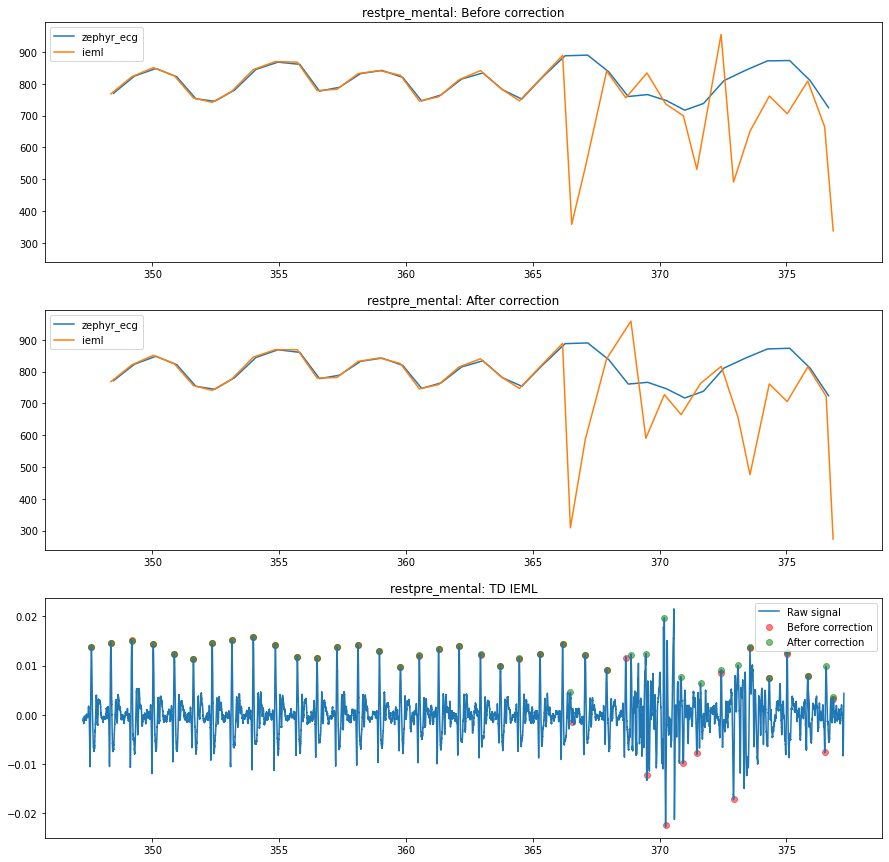

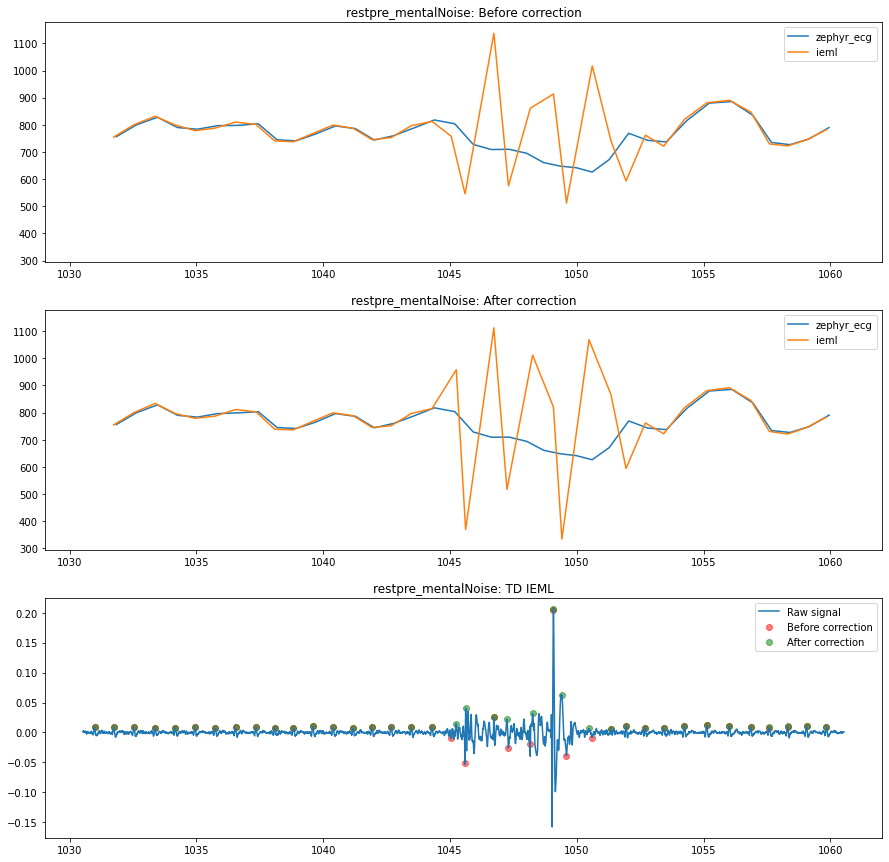

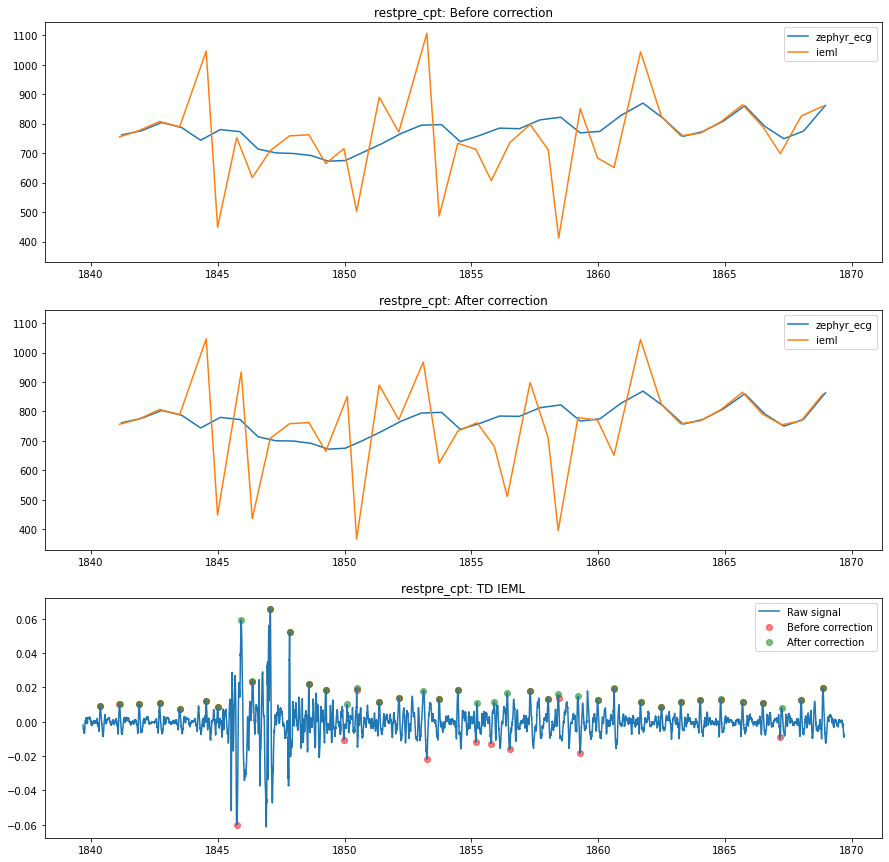

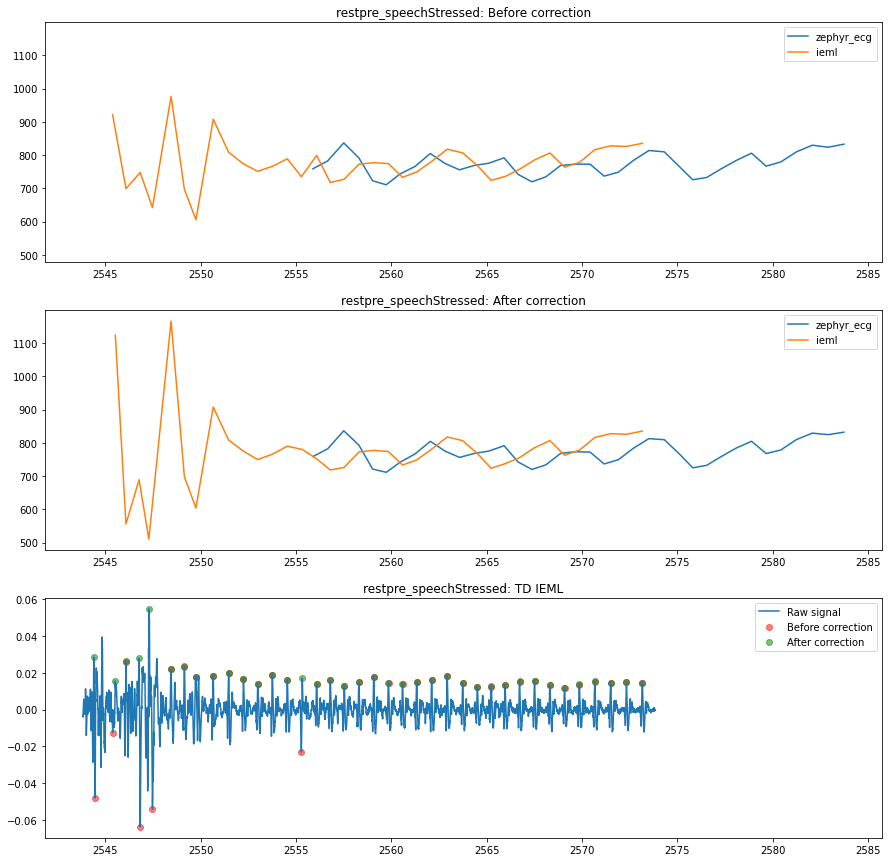

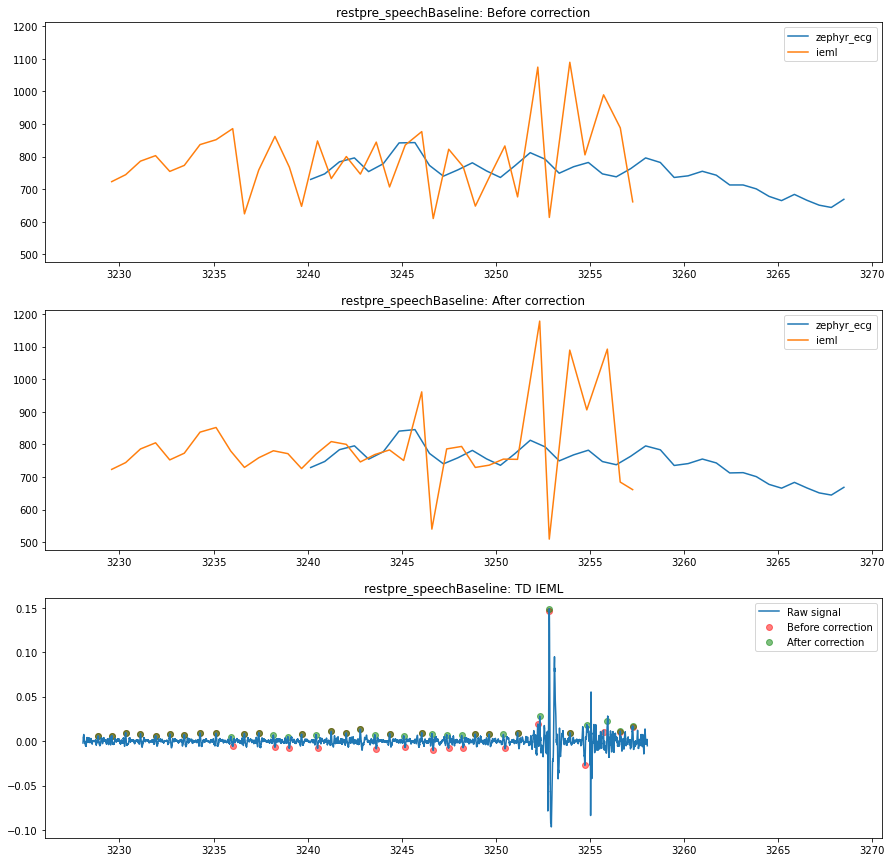

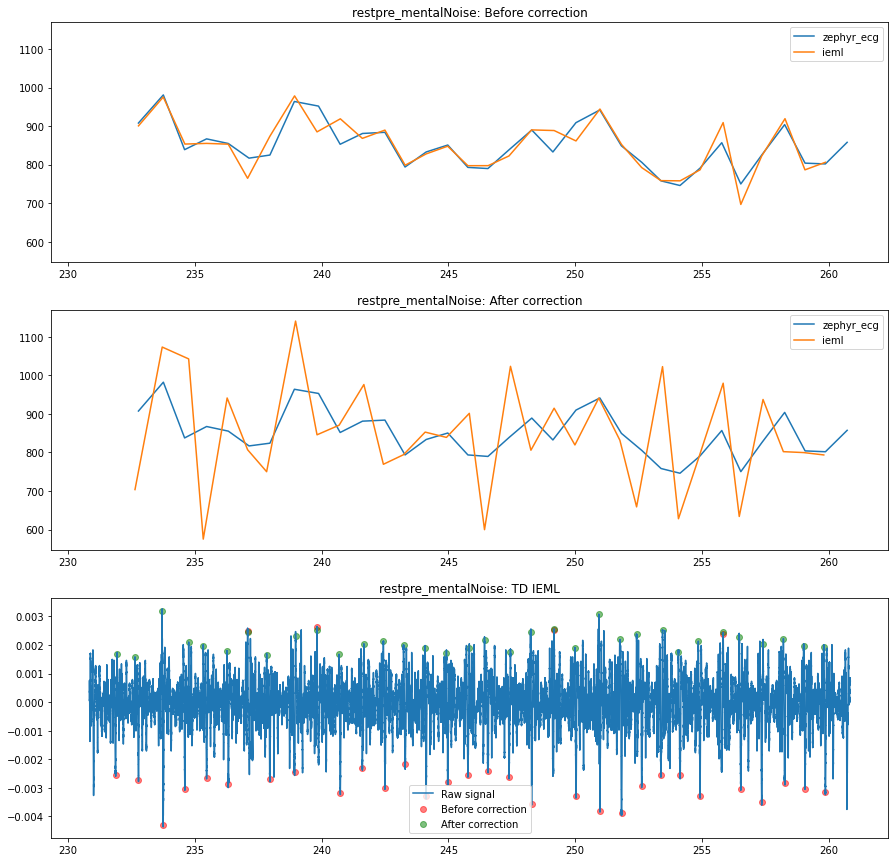

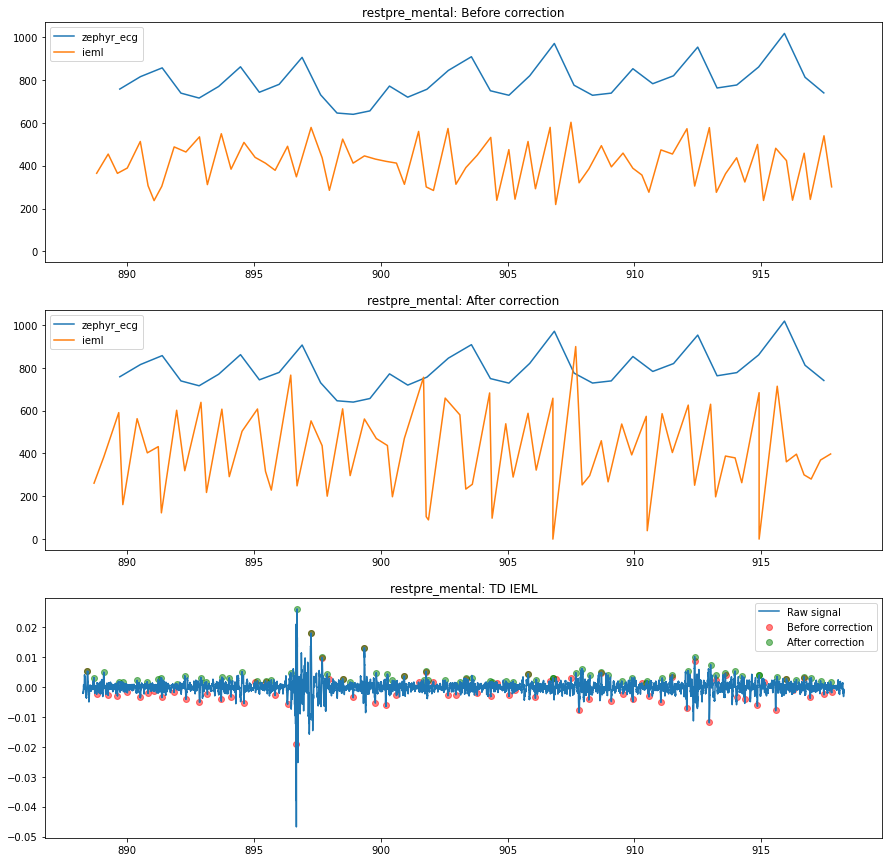

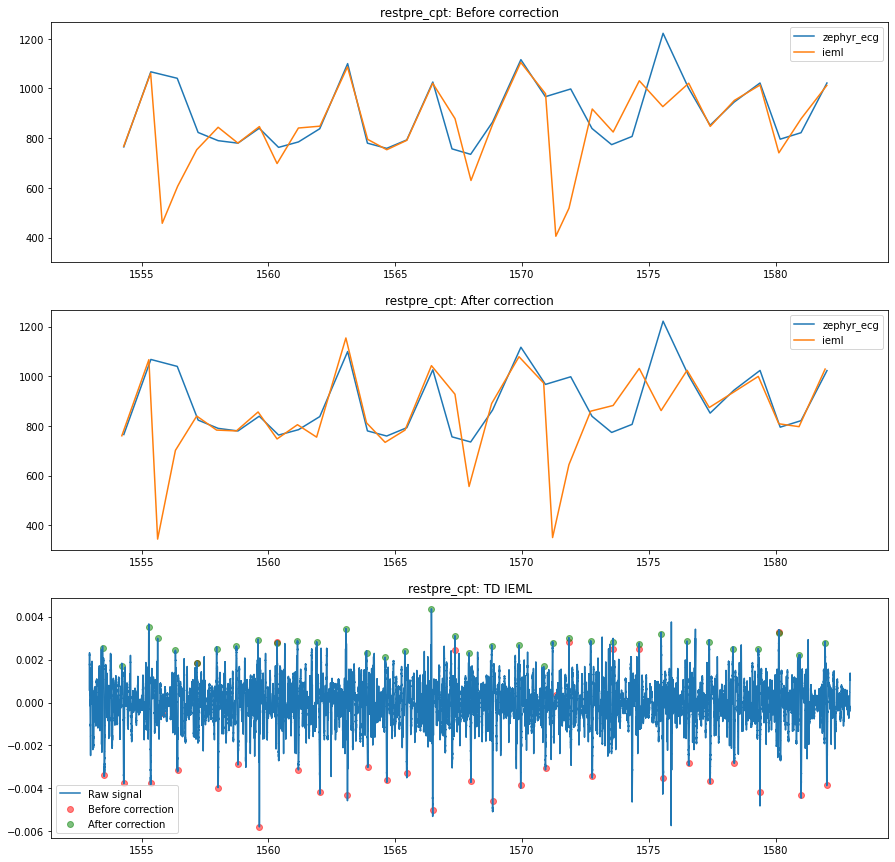

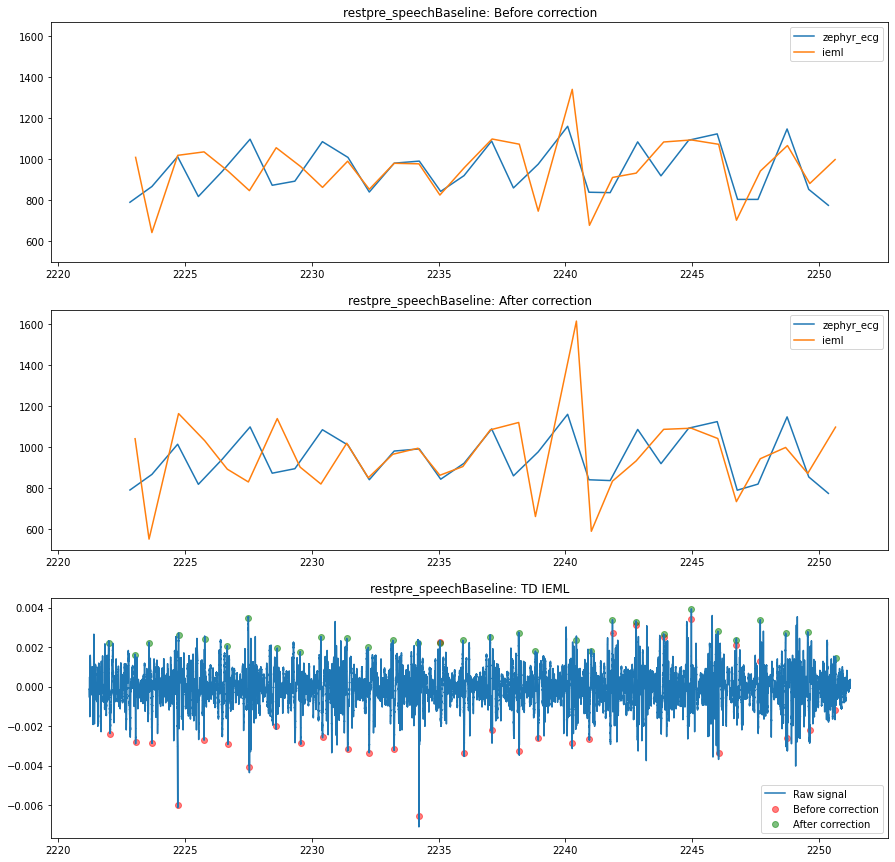

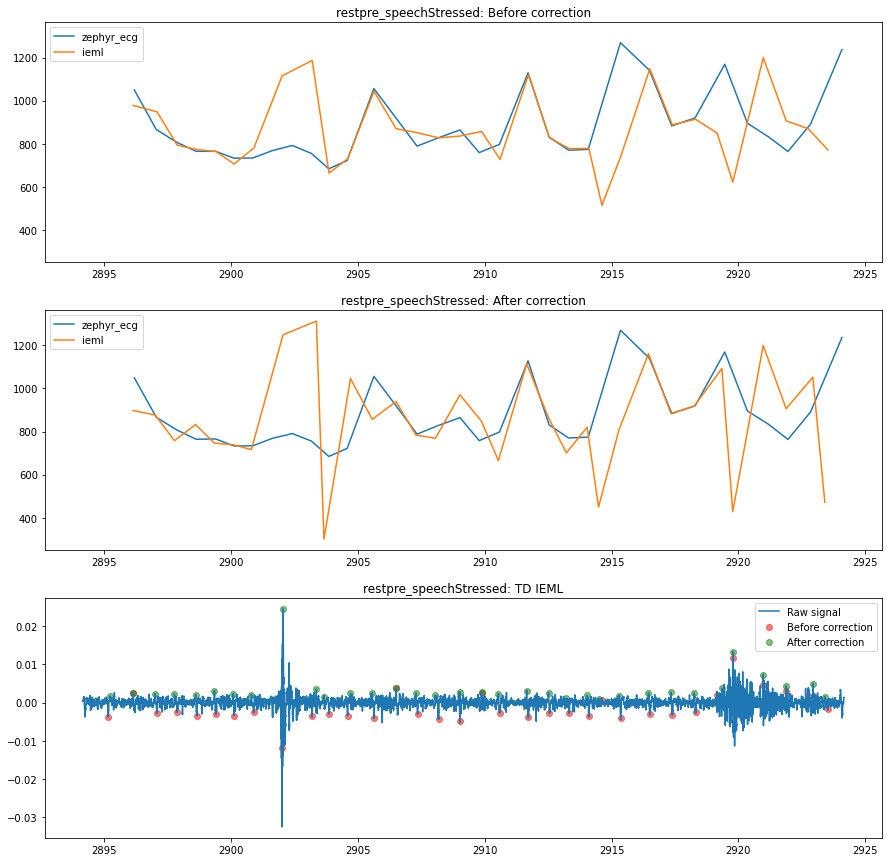

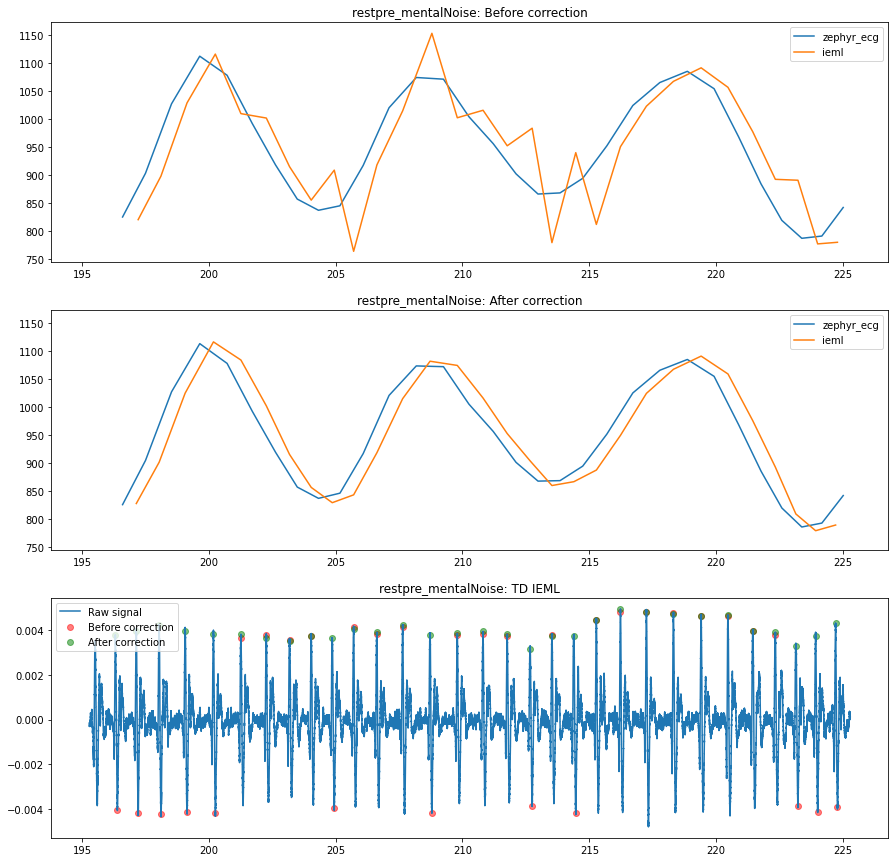

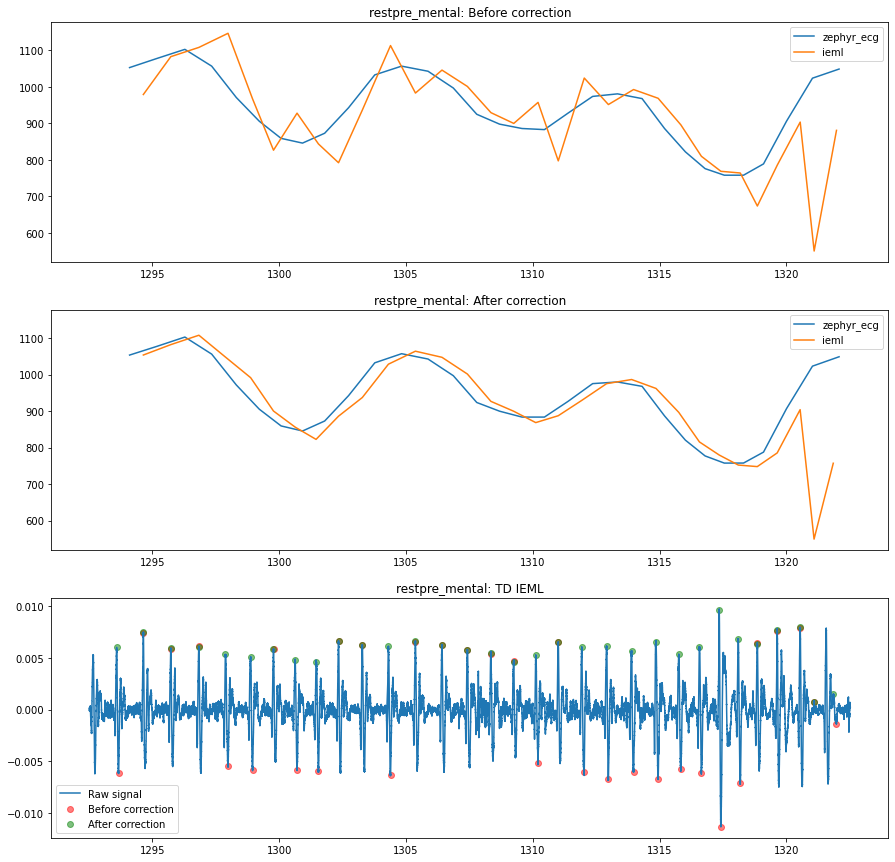

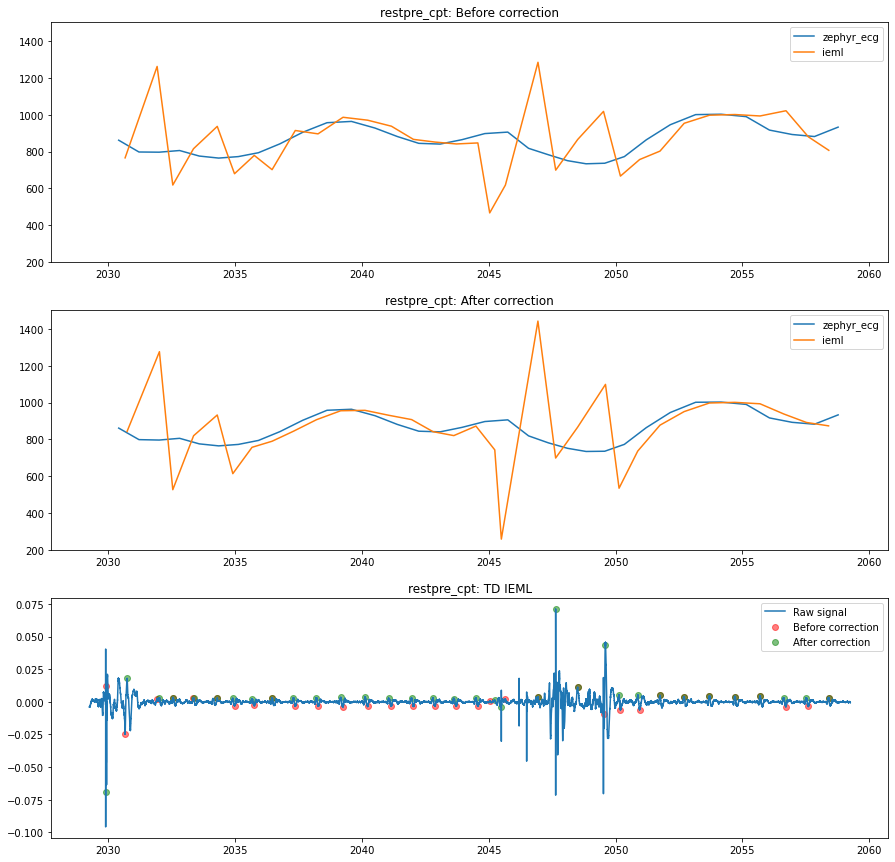

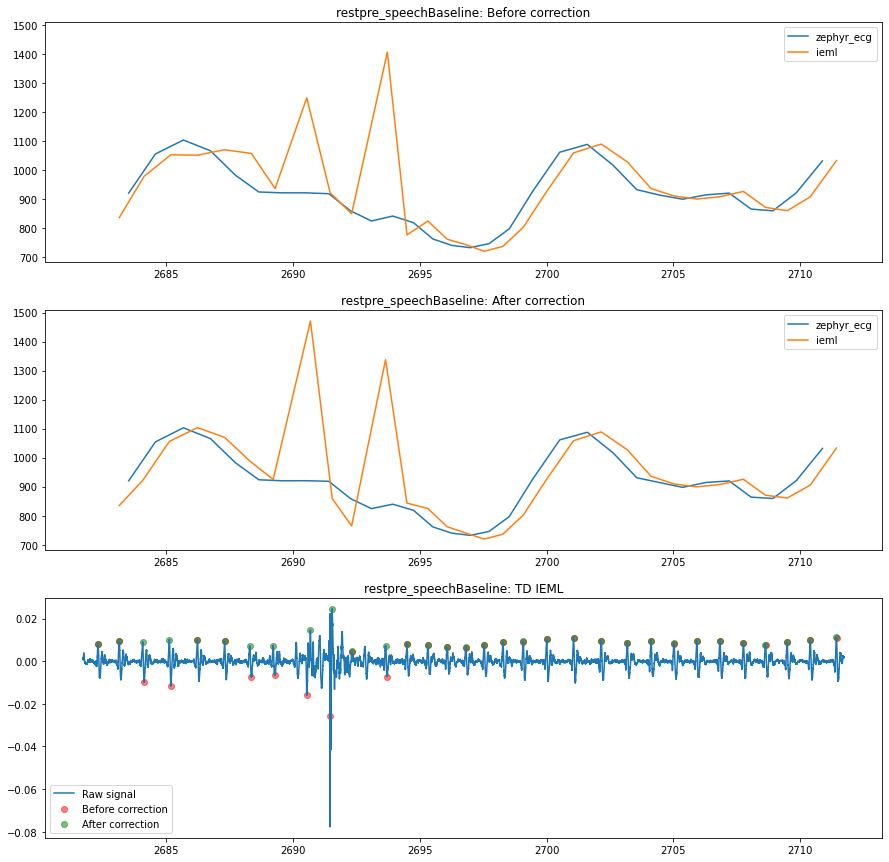

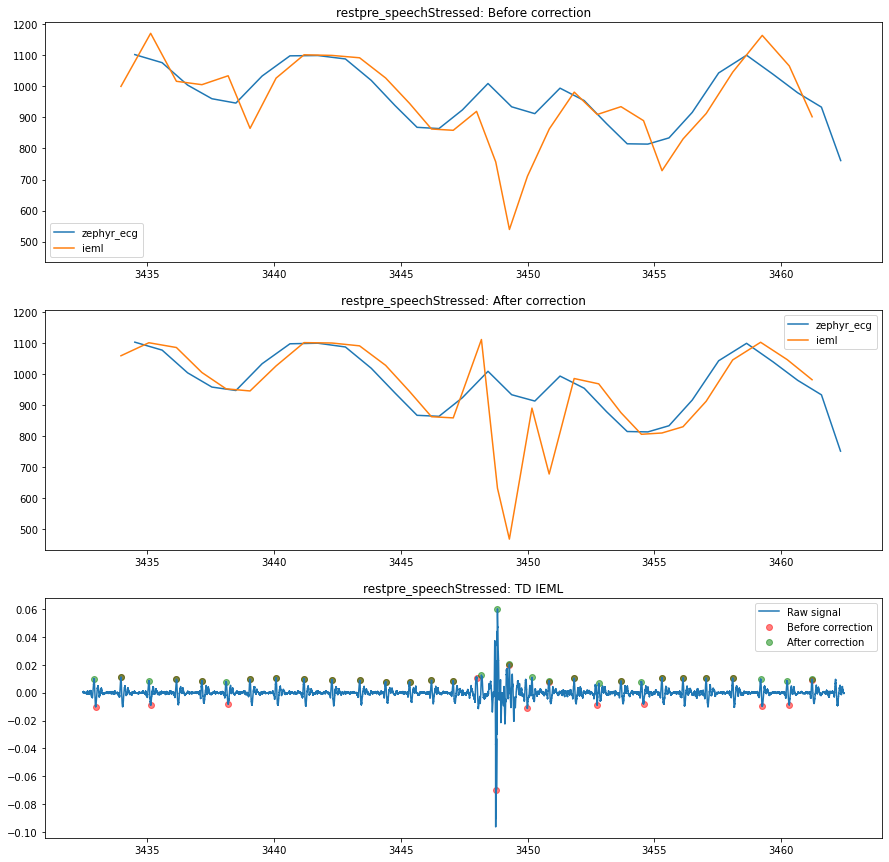

In [15]:
for json_path in json_paths:
    with open(json_path, "r") as json_file:
        data = load(json_file)
    for rest in data.keys():
        file_name_start = os.path.splitext(os.path.basename(json_path))[0]
        fig_file_name = file_name_start + "_" + rest + "_peak_cor.png"
        fig_file_path = os.path.join(out_figure_dir_path, fig_file_name)
        sig_names = data[rest].keys()
        fig = plt.figure(figsize=(15,15))
        ax1 = fig.add_subplot(311)
        for sig_name in sig_names:
            rri, rri_time = peak_time_to_rri(data[rest][sig_name]["peak_time"])
            ax1.plot(rri_time, rri)
        ax1.legend(sig_names)
        ax1.set_title(rest + ": Before correction")
        ax2 = fig.add_subplot(312, sharey=ax1, sharex=ax1)   
        for sig_name in sig_names:
            rri, rri_time = peak_time_to_rri(data[rest][sig_name]["cor_peak_time"])
            ax2.plot(rri_time, rri)
        ax2.set_title(rest + ": After correction")
        ax2.legend(sig_names)
        sig_info = data[rest]["ieml"]
        sig=sig_info["sig"]
        sig_time=sig_info["time"]
        sampling_rate=sig_info["sampling_rate"]
        peaks = sig_info["peak_time"]
        new_peaks = sig_info["cor_peak_time"]
        ax3 = fig.add_subplot(313, sharex=ax1)   
        ax3.plot(sig_time, sig)
        samp = timestamp_to_samp(peaks, sampling_rate, sig_time)
        peaks = peaks[samp > 0]
        samp = samp[samp > 0]
        ax3.scatter(peaks,
                    sig[samp], color="red", alpha=0.5)
        samp = timestamp_to_samp(new_peaks, sampling_rate, sig_time)
        new_peaks = new_peaks[samp > 0]
        samp = samp[samp > 0]
        ax3.set_title(rest + ": TD IEML")
        ax3.scatter(new_peaks,
                    sig[samp], color="green", alpha=0.5)
        ax3.legend(["Raw signal","Before correction", "After correction"])
        plt.savefig(fig_file_path)
        plt.show()

In [16]:
json_path = json_paths[2]
with open(json_path, "r") as json_file:
    data = load(json_file)

In [30]:
json_path

'Z:Shared\\Documents\\RD\\RD2\\_Projets\\Pascal\\P5 In-Ear Biosignal Monitoring\\DanielleEersBridge\\P5_Stress_label\\_gitSave\\hb_extraction\\rests_5subs\\json_files\\out3.json'

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


2681.696
2711.6958749992905


TypeError: only integer scalar arrays can be converted to a scalar index

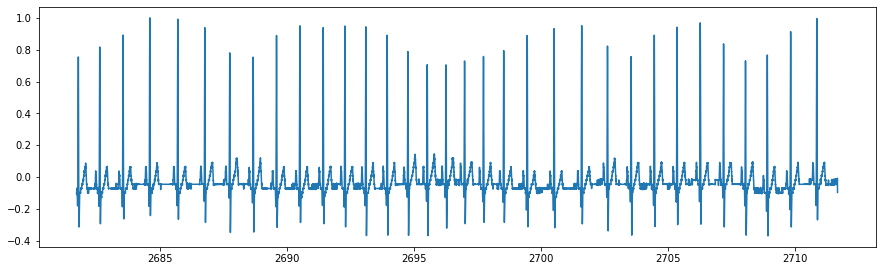

In [63]:
# need to debug participant 3
rest = "restpre_speechBaseline"
sigs = data[rest].keys()
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
for sig in sigs:
    label = rest
    start = class_timestamps[class_timestamps["label"]==label]["start_time"].values[0]
    end = class_timestamps[class_timestamps["label"]==label]["end_time"].values[0]
    start = start + 15
    end = start + 30
    sig_info = P5_StressDataLoader(sub_id=sub_id).get_sig(sig_name=sig, start_time=start, end_time=end, new_sampling_rate=8000)
    print(np.min(sig_info["time"]))
    print(np.max(sig_info["time"]))
    ax1.plot(sig_info["time"],sig_info["sig"]/np.max(sig_info["sig"]))
    sig_info["peak_time"] = hb_extract(sig=sig_info["sig"], sig_time=sig_info["time"], sig_name=sig_info["name"])
    peak_time = sig_info["peak_time"]
    samp = timestamp_to_samp(peak_time, sampling_rate, sig_time)
    peak_time = peak_time[samp > 0]
    samp = samp[samp > 0]
    ax1.scatter(peak_time,
                sig[samp], color="red", alpha=0.5)
    """
    
    print(np.min(data[rest][sig]["time"]))
    print(np.max(data[rest][sig]["time"]))
    print(np.min(data[rest][sig]["peak_time"]))
    print(np.max(data[rest][sig]["peak_time"]))
    rri, rri_time = peak_time_to_rri(data[rest][sig]["peak_time"])
    ax1.plot(rri_time, rri)
ax1.legend(sigs)
ax1.set_title(rest + ": Before correction")
ax2 = fig.add_subplot(312, sharey=ax1, sharex=ax1)   
for sig in sigs:
    rri, rri_time = peak_time_to_rri(data[rest][sig]["cor_peak_time"])
    ax2.plot(rri_time, rri)
ax2.set_title(rest + ": After correction")
ax2.legend(sigs)
"""


In [64]:
sig_name = "zephyr_ecg"
sig_info = P5_StressDataLoader(sub_id=sub_id).get_sig(sig_name=sig_name, start_time=start, end_time=end, new_sampling_rate=8000)
sig = sig_info["sig"]
sampling_rate = sig_info["sampling_rate"]
sig_time = sig_info["time"]


C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


In [65]:
import scipy
if sampling_rate > 1000:
            old_sampling_rate = sampling_rate
            sampling_rate = 1000
            sig, sig_time = scipy.signal.resample(sig, 
                                        int(len(sig) * 
                                            (sampling_rate / 
                                             old_sampling_rate)
                                            ),
                                        t=sig_time
                                        )

In [66]:
processed = nk.ecg.ecg_process(sig, sampling_rate=sampling_rate, method="neurokit")

In [67]:
sig_time

array([2681.696     , 2681.697     , 2681.698     , ..., 2711.69300001,
       2711.69400001, 2711.69500001])

In [62]:
int_peak_col = "ECG_R_Peaks"
int_peak = processed[0][int_peak_col].astype(int)
peak_as_one = int_peak/np.max(int_peak)
peak_samp = np.where(peak_as_one == 1)[0]
peak_time = samp_to_timestamp(samp=peak_samp, 
                              sampling_rate=sampling_rate, 
                              sig_time=sig_time)
peak_time

array([2682.606     , 2683.526     , 2684.581     , 2685.684     ,
       2686.75      , 2687.732     , 2688.656     , 2689.577     ,
       2690.497     , 2691.415     , 2692.274     , 2693.098     ,
       2693.938     , 2694.757     , 2695.518     , 2696.258     ,
       2696.991     , 2697.736     , 2698.534     , 2699.461     ,
       2700.521     , 2701.609     , 2702.625     , 2703.557     ,
       2704.47      , 2705.368     , 2706.28300001, 2707.20300001,
       2708.06700001, 2708.92600001, 2709.84700001, 2710.87900001])

In [48]:
int_peak

0         0
1         0
2         0
3         0
4         0
         ..
239995    0
239996    0
239997    0
239998    0
239999    0
Name: ECG_R_Peaks, Length: 240000, dtype: int32

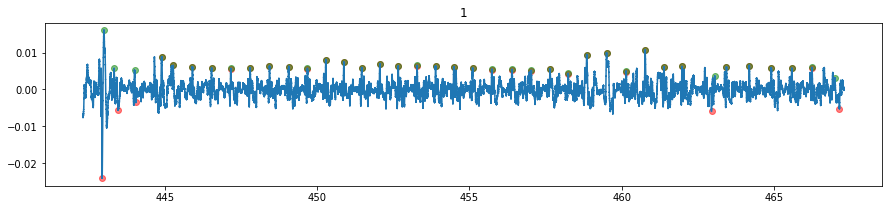

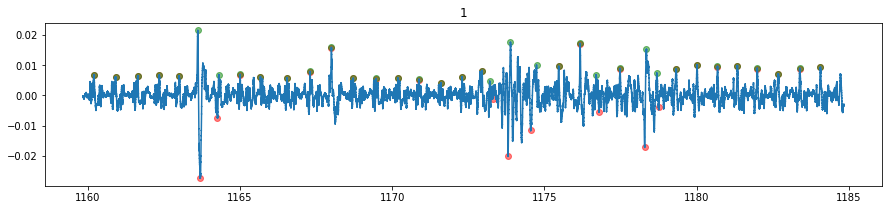

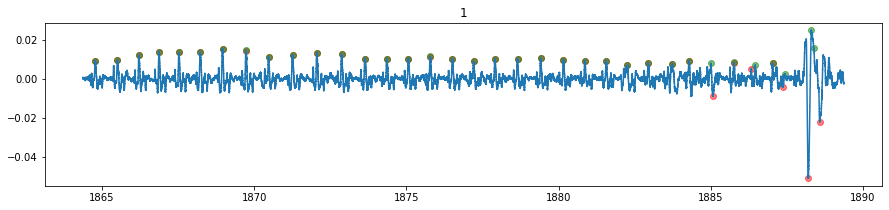

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


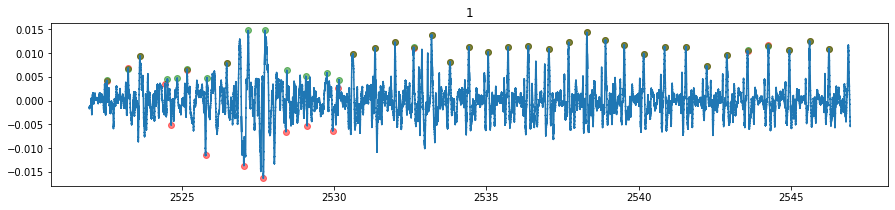

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


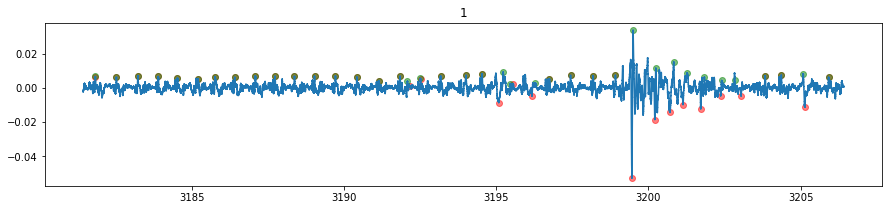

Rest duration was only 124.93395499999997. Skipping.
Rest duration was only 22.984112000000096. Skipping.


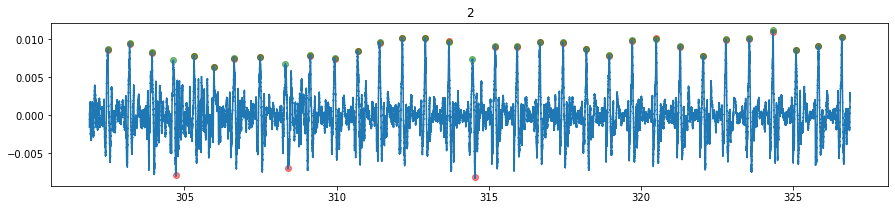

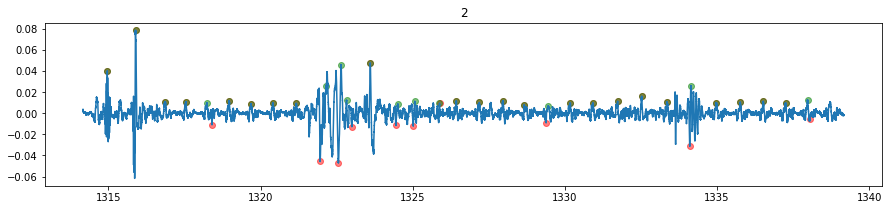

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


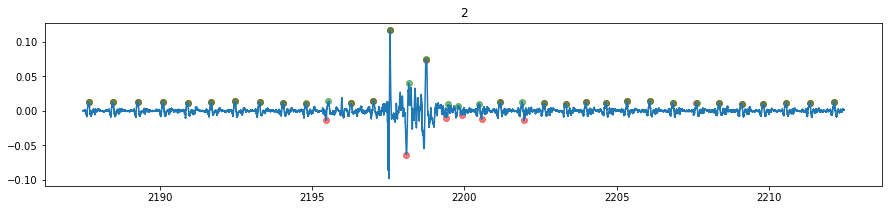

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


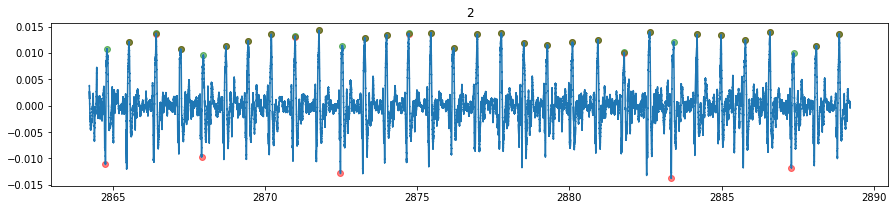

Rest duration was only 67.61083200000007. Skipping.


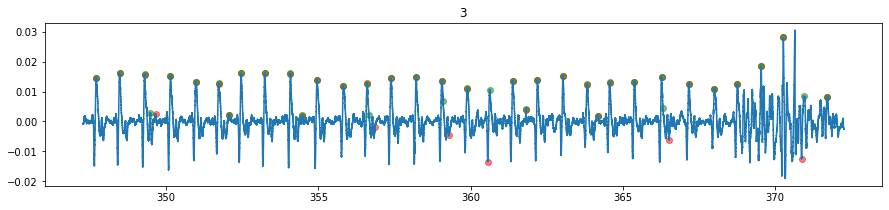

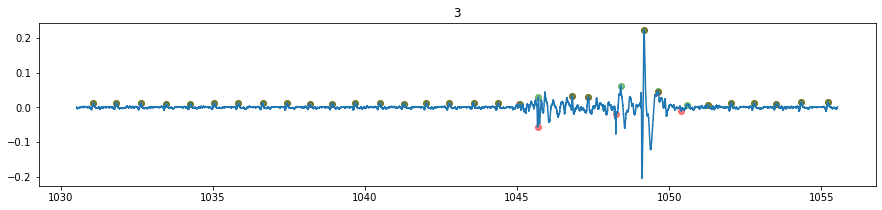

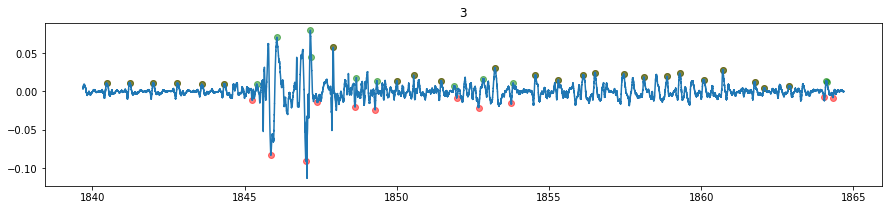

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


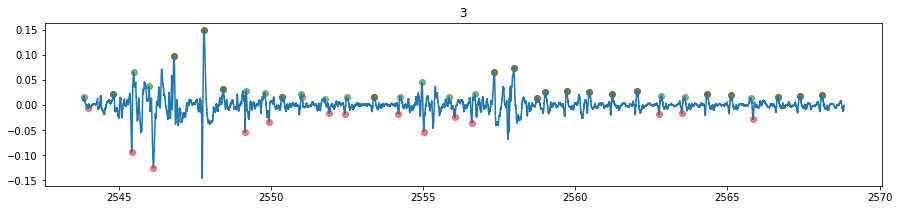

C:\Users\dbenesch\eers\git\p5-stress-classifier\src\stresspred\preprocessing.py:163: UserWarning: Warning: the difference between timepoints is not uniform
  warn("Warning: the difference between timepoints is not uniform")


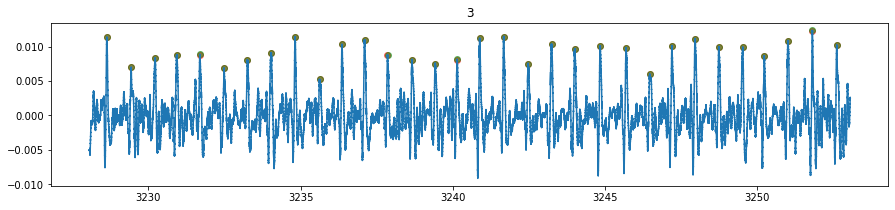

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'Z:Shared\\Documents\\RD\\RD2\\_AudioRD\\datasets\\Biosignals\\CritiasStress\\synchedOriginal\\P05_Malahat_28-02-2022_V1prompt\\IEM_L.wav'

In [34]:
for sub_id in [1,2,3,5,6]:
    class_timestamps = P5_StressDataLoader(sub_id=sub_id).get_timestamps_df_for_class()
    rest_labels = [label for label in class_timestamps["label"].values if "rest" in label]
    for label in rest_labels:
        start = class_timestamps[class_timestamps["label"]==label]["start_time"].values[0]
        end = class_timestamps[class_timestamps["label"]==label]["end_time"].values[0]
        start = start + 15
        end = start + 25
        sig_info = P5_StressDataLoader(sub_id=sub_id).get_sig(sig_name="ieml", start_time=start, end_time=end, new_sampling_rate=8000)

        sig_info["peak_time"] = hb_extract(sig=sig_info["sig"], sig_time=sig_info["time"], sig_name=sig_info["name"])
        sig_info["cor_peak_time"] = find_local_hb_peaks(sig_info["peak_time"], 
                             sig=sig_info["sig"], 
                             sig_time=sig_info["time"], 
                             sampling_rate=sig_info["sampling_rate"], 
                             check_height_outlier=True)
        fig = plt.figure(figsize=(15,3))
        sig=sig_info["sig"]
        sig_time=sig_info["time"]
        sampling_rate=sig_info["sampling_rate"]
        peaks = sig_info["peak_time"]
        new_peaks = sig_info["cor_peak_time"]
        plt.plot(sig_time, sig)
        samp = timestamp_to_samp(peaks, sampling_rate, sig_time)
        peaks = peaks[samp > 0]
        samp = samp[samp > 0]
        plt.scatter(peaks,
                    sig[samp], color="red", alpha=0.5)
        samp = timestamp_to_samp(new_peaks, sampling_rate, sig_time)
        new_peaks = new_peaks[samp > 0]
        samp = samp[samp > 0]
        plt.title(str(sub_id))
        plt.scatter(new_peaks,
                    sig[samp], color="green", alpha=0.5)
        plt.show()

Rest duration was only 67.61083200000007. Skipping.


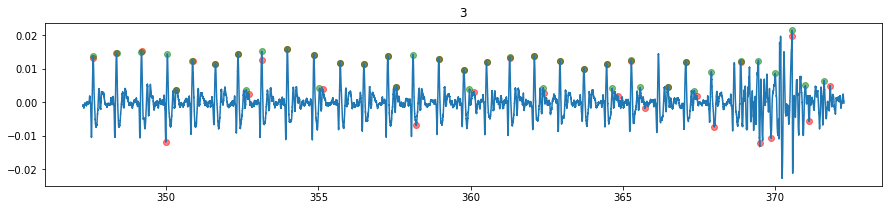

In [25]:
sub_id = 3
class_timestamps = P5_StressDataLoader(sub_id=sub_id).get_timestamps_df_for_class()
rest_labels = [label for label in class_timestamps["label"].values if "rest" in label]
label = rest_labels[0]        
start = class_timestamps[class_timestamps["label"]==label]["start_time"].values[0]
end = class_timestamps[class_timestamps["label"]==label]["end_time"].values[0]
start = start + 15
end = start + 25
sig_info = P5_StressDataLoader(sub_id=sub_id).get_sig(sig_name="ieml", start_time=start, end_time=end, new_sampling_rate=8000)

sig_info["peak_time"] = hb_extract(sig=sig_info["sig"], sig_time=sig_info["time"], sig_name=sig_info["name"])
sig_info["cor_peak_time"] = find_local_hb_peaks(sig_info["peak_time"], 
                     sig=sig_info["sig"], 
                     sig_time=sig_info["time"], 
                     sampling_rate=sig_info["sampling_rate"], 
                     check_height_outlier=True)
fig = plt.figure(figsize=(15,3))
sig=sig_info["sig"]
sig_time=sig_info["time"]
sampling_rate=sig_info["sampling_rate"]
peaks = sig_info["peak_time"]
new_peaks = sig_info["cor_peak_time"]
plt.plot(sig_time, sig)
samp = timestamp_to_samp(peaks, sampling_rate, sig_time)
peaks = peaks[samp > 0]
samp = samp[samp > 0]
plt.scatter(peaks,
            sig[samp], color="red", alpha=0.5)
samp = timestamp_to_samp(new_peaks, sampling_rate, sig_time)
new_peaks = new_peaks[samp > 0]
samp = samp[samp > 0]
plt.title(str(sub_id))
plt.scatter(new_peaks,
            sig[samp], color="green", alpha=0.5)
plt.show()

In [26]:
import numpy as np
np.diff(new_peaks)

array([0.768125, 0.820875, 0.8505  , 0.29575 , 0.529375, 0.755875,
       0.74075 , 0.27325 , 0.503375, 0.845375, 0.86875 , 0.183875,
       0.684375, 0.77925 , 0.78125 , 0.281625, 0.550125, 0.84275 ,
       0.825125, 0.185125, 0.560625, 0.758875, 0.814625, 0.28375 ,
       0.556375, 0.785   , 0.746875, 0.18275 , 0.6325  , 0.2885  ,
       0.90875 , 0.586625, 0.28525 , 0.554375, 0.960375, 0.588375,
       0.55475 , 0.548125, 0.440875, 0.612375])

In [72]:
min_bpm = 40
max_bpm = 200
interval_min = 60/max_bpm
interval_max = 60/min_bpm
peaks_clean_samp = nk.signal_fixpeaks(
    samp,
    sampling_rate=sampling_rate,
    interval_min=interval_min, interval_max=interval_max, method="neurokit")
peaks_clean_time = samp_to_timestamp(peaks_clean_samp, sig_time=sig_time)

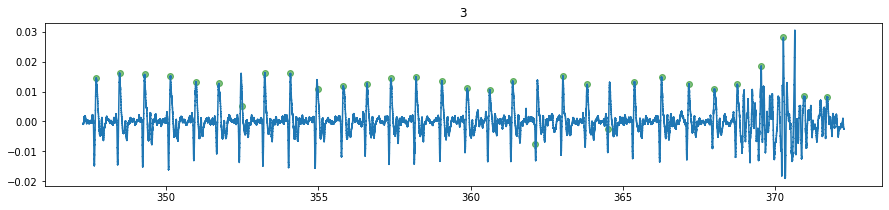

In [73]:
fig = plt.figure(figsize=(15,3))
sig=sig_info["sig"]
sig_time=sig_info["time"]
sampling_rate=sig_info["sampling_rate"]
plt.plot(sig_time, sig)
plt.scatter(peaks_clean_time,
            sig[peaks_clean_samp], color="green", alpha=0.5)

plt.title(str(sub_id))
plt.show()

In [74]:
cor_clean_peaks = find_local_hb_peaks(peaks_clean_time, 
                     sig=sig_info["sig"], 
                     sig_time=sig_info["time"], 
                     sampling_rate=sig_info["sampling_rate"], 
                     check_height_outlier=True)

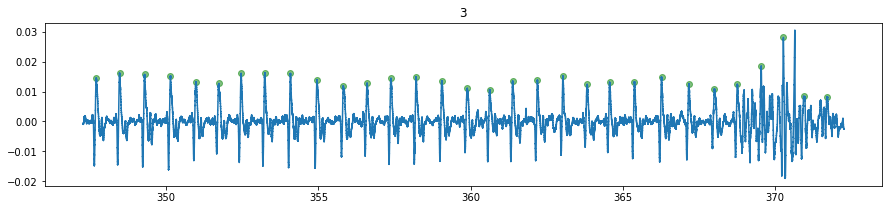

In [75]:
fig = plt.figure(figsize=(15,3))
sig=sig_info["sig"]
sig_time=sig_info["time"]
sampling_rate=sig_info["sampling_rate"]
plt.plot(sig_time, sig)
peaks = cor_clean_peaks
samp = timestamp_to_samp(peaks, sampling_rate, sig_time)
peaks = peaks[samp > 0]
samp = samp[samp > 0]

plt.scatter(peaks,
            sig[samp], color="green", alpha=0.5)

plt.title(str(sub_id))
plt.show()

In [ ]:
plt.plot(sig_time, sig)
plt.scatter(peaks_clean_time,
            sig[peaks_clean_samp], color="green", alpha=0.5)

plt.title(str(sub_id))
plt.show()

In [67]:
np.diff(peaks_clean/sampling_rate)

array([0.76729167, 0.81997917, 0.85170833, 0.83595833, 0.74925   ,
       0.77983333, 0.73608333, 0.841     , 0.89620833, 0.84008333,
       0.78366667, 0.78258333, 0.82610417, 0.8433125 , 0.83545833,
       0.7359375 , 0.7615625 , 0.735875  , 0.91254167, 0.79641667,
       0.6994375 , 0.85345833, 0.88866667, 0.8988125 , 0.8409375 ,
       0.75079167, 0.7849375 , 0.7288125 , 0.665     , 0.782875  ])

In [66]:
len(peaks_clean[1])

TypeError: object of type 'numpy.int32' has no len()

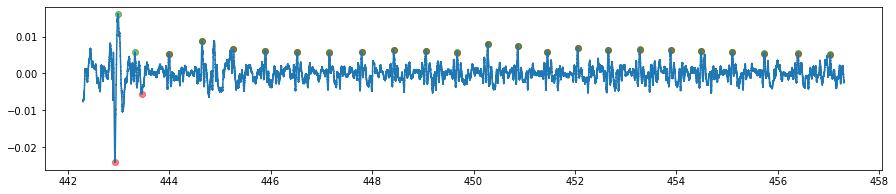